In [2332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# For K Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

plt.style.use("ggplot")

In [2333]:
df_1=pd.read_csv("sales_data.csv")
df_2=pd.read_csv("outlets_data.csv")
df_4=pd.read_csv('freezer_data.csv')
df_3=pd.read_csv('product_data.csv')
df_5=pd.read_csv('week_data.csv')

In [2334]:
df_1.shape

(81000, 5)

# Data cleaning

In [2335]:
print(df_1.head())
print(df_1['Outlet_ID'].nunique())
null_counts = df_1.isnull().sum()
print(null_counts)

  Outlet_ID  week  pid              product_name  no_units
0    ID7203     1  IP1         Vanilla Mini Cone     874.0
1    ID7203     1  IP2      Chocolate Petite Bar     105.0
2    ID7203     1  IP3       Strawberry Tiny Cup    1198.0
3    ID7203     1  IP4        Mint Bite-size Pop     502.0
4    ID7203     1  IP5  Butter Pecan Small Stick     710.0
951
Outlet_ID       0
week            0
pid             0
product_name    0
no_units        0
dtype: int64


In [2336]:
# is there any duplicate rows

duplicate_rows = df_1.duplicated(keep=False)
# print the duplicate rows
# print("Duplicate rows:")
df_1[duplicate_rows]

,Outlet_ID,week,pid,product_name,no_units
17468,ID8278,4,BP2,Moose Tracks Jumbo Cup,88.0
20131,ID1750,7,BP5,Cookies and Cream Mega Tub,68.0
20927,ID8278,4,BP2,Moose Tracks Jumbo Cup,88.0
22049,ID7957,12,BP1,Chocolate Fudge Big Scoop,46.0
22632,ID3549,9,BP2,Moose Tracks Jumbo Cup,95.0
23443,ID7957,12,BP1,Chocolate Fudge Big Scoop,46.0
34703,ID3549,9,BP2,Moose Tracks Jumbo Cup,95.0
52647,ID4015,10,BP4,Rocky Road Mega Tub,43.0
57410,ID4015,10,BP4,Rocky Road Mega Tub,43.0
62348,ID8867,6,BP4,Rocky Road Mega Tub,71.0


In [2337]:


#drop the duplicate rows

df_1 = df_1.drop_duplicates()

In [2338]:
print(df_2.head())
null_counts = df_2.isnull().sum()
print(df_2.nunique)
null_counts

  Outlet_ID  area(sqft)
0    ID7203        5660
1    ID1878        4138
2    ID1740        5546
3    ID4366        5134
4    ID8358        4100
<bound method DataFrame.nunique of     Outlet_ID  area(sqft)
0      ID7203        5660
1      ID1878        4138
2      ID1740        5546
3      ID4366        5134
4      ID8358        4100
..        ...         ...
983    ID4119        3858
984    ID2978        3495
985    ID6549        1141
986    ID1210        3322
987    ID8207        3539

[988 rows x 2 columns]>


Outlet_ID     0
area(sqft)    0
dtype: int64

In [2339]:
# is there any duplicate rows

duplicate_rows = df_2.duplicated(keep=False)
# print the duplicate rows
print("Duplicate rows:")
df_2[duplicate_rows]

Duplicate rows:


,Outlet_ID,area(sqft)


In [2340]:
df = pd.merge(df_1, df_2, on='Outlet_ID')
df.head()

,Outlet_ID,week,pid,product_name,no_units,area(sqft)
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,5660
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,5660
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,5660
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,5660
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,5660


In [2341]:
print(df_3.head())
null_counts = df_3.isnull().sum()
print(null_counts)

   pid  volume              product_name  price
0  IP1     0.2         Vanilla Mini Cone    100
1  IP2     0.2      Chocolate Petite Bar     90
2  IP3     0.2       Strawberry Tiny Cup    110
3  IP4     0.2        Mint Bite-size Pop    100
4  IP5     0.2  Butter Pecan Small Stick    100
pid             0
volume          0
product_name    0
price           0
dtype: int64


In [2342]:
# is there any duplicate rows

duplicate_rows = df_3.duplicated(keep=False)
# print the duplicate rows
print("Duplicate rows:")
df_3[duplicate_rows]

Duplicate rows:


,pid,volume,product_name,price


In [2343]:
df = df.drop('product_name', axis=1)
df = pd.merge(df, df_3, on='pid')


In [2344]:
df.columns

Index(['Outlet_ID', 'week', 'pid', 'no_units', 'area(sqft)', 'volume',
       'product_name', 'price'],
      dtype='object')

## Duplication

In [2345]:
# get the duplicate rows
duplicate_rows = df.duplicated(keep=False)

# print the duplicate rows
print("Duplicate rows:")
df[duplicate_rows]

Duplicate rows:


,Outlet_ID,week,pid,no_units,area(sqft),volume,product_name,price


## Outliers

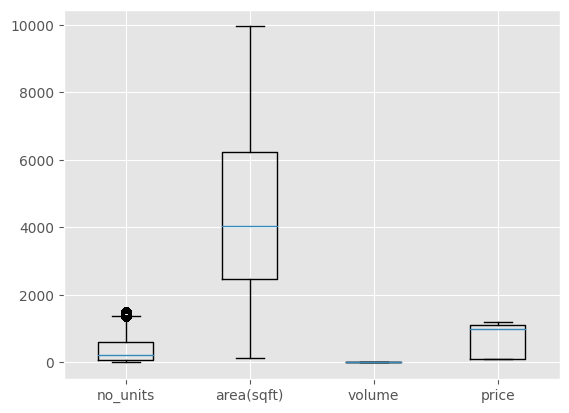

In [2346]:
#to identify outliers
selected_df = df.loc[:, ~df.columns.isin(['Outlet_ID', 'week', 'pid', 'product_name'])]


# create a boxplot of the selected columns
plt.boxplot(selected_df.values, labels=selected_df.columns)
plt.show()

In [2347]:
for col in selected_df:
    col_data = df[col]
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    num_outliers = ((col_data < lower_bound) | (col_data > upper_bound)).sum()
    percent_outliers = num_outliers / col_data.size * 100
    print(f'The percentage of outliers in column {col} is {percent_outliers:.2f}%.')

The percentage of outliers in column no_units is 1.98%.
The percentage of outliers in column area(sqft) is 0.00%.
The percentage of outliers in column volume is 0.00%.
The percentage of outliers in column price is 0.00%.


## Correlations

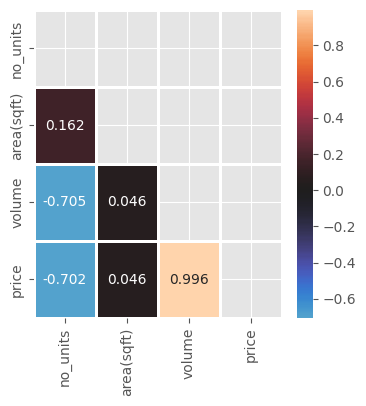

In [2348]:
selected_df = df.loc[:, ~df.columns.isin(['Outlet_ID', 'week', 'pid', 'product_name'])]
corr=selected_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(4,4)) 
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

# Data Visualization

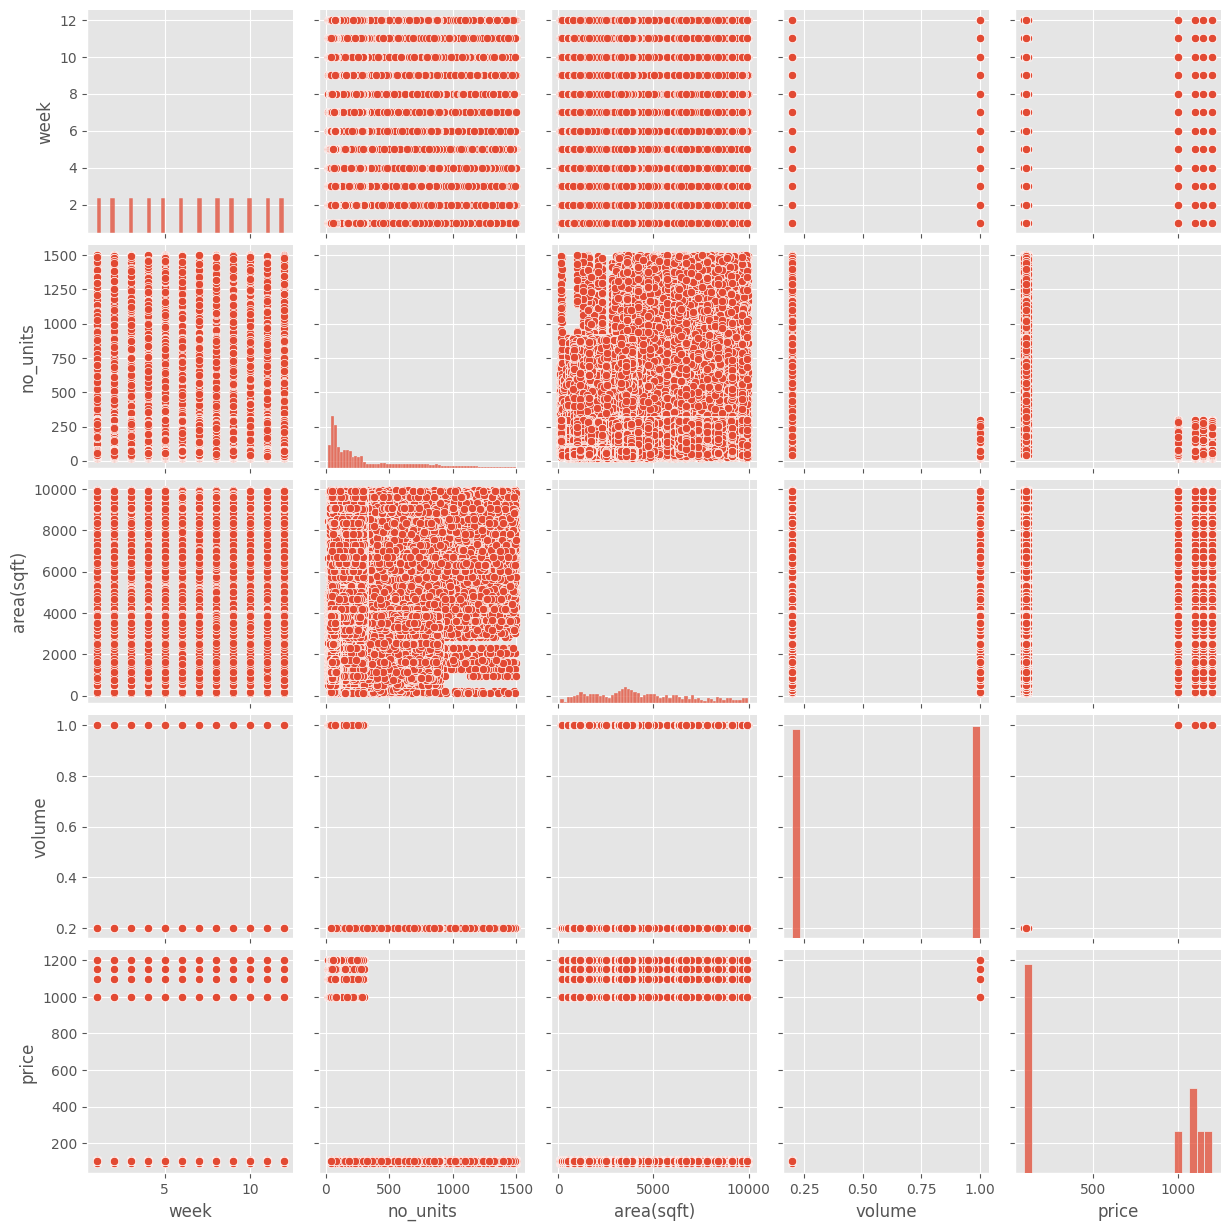

In [2349]:
sns.pairplot(df)
plt.show()

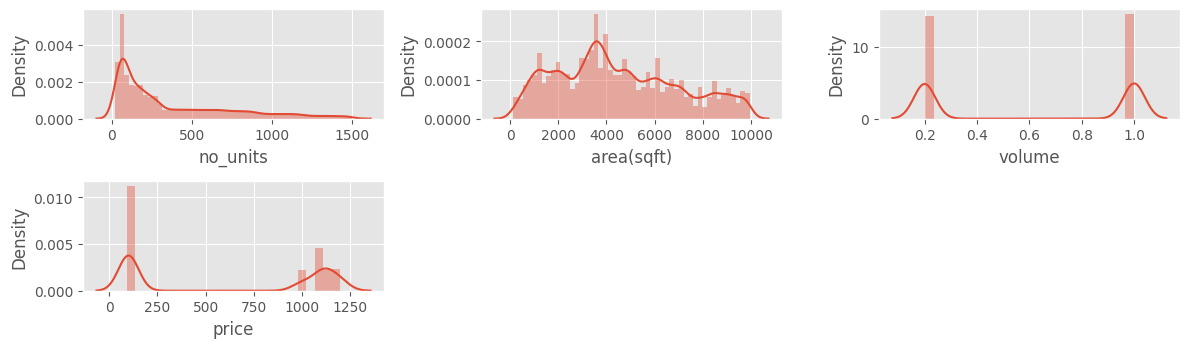

In [2350]:
# univariate analysis

fig=plt.subplots(figsize=(12, 10))

for i, feature in enumerate(df.drop(['Outlet_ID', 'week', 'pid', 'product_name'], axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(df[feature])
    plt.tight_layout()

# Feature Engineering

<function matplotlib.pyplot.show(close=None, block=None)>

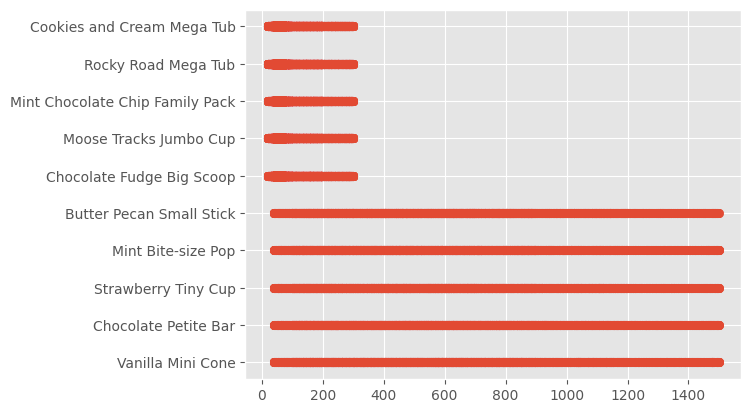

In [2351]:
plt.scatter(df_1['no_units'], df_1['product_name'])
plt.show

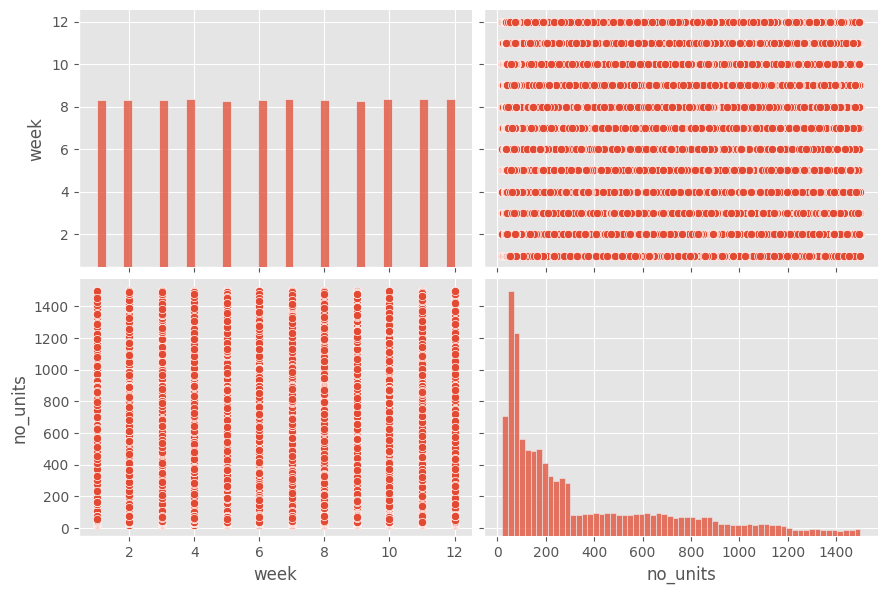

In [2352]:
# Plot the pair plot
sns.pairplot(df_1, height=3, aspect=1.5)
plt.show()

# Creating new features 

In [2353]:
df['Total_volume'] = df['no_units'] * df['volume']
df.head()

,Outlet_ID,week,pid,no_units,area(sqft),volume,product_name,price,Total_volume
0,ID7203,1,IP1,874.0,5660,0.2,Vanilla Mini Cone,100,174.8
1,ID7203,2,IP1,644.0,5660,0.2,Vanilla Mini Cone,100,128.8
2,ID7203,3,IP1,600.0,5660,0.2,Vanilla Mini Cone,100,120.0
3,ID7203,4,IP1,106.0,5660,0.2,Vanilla Mini Cone,100,21.2
4,ID7203,5,IP1,775.0,5660,0.2,Vanilla Mini Cone,100,155.0


In [2354]:
df['Total_price'] = df['no_units'] * df['price']
df.head()

,Outlet_ID,week,pid,no_units,area(sqft),volume,product_name,price,Total_volume,Total_price
0,ID7203,1,IP1,874.0,5660,0.2,Vanilla Mini Cone,100,174.8,87400.0
1,ID7203,2,IP1,644.0,5660,0.2,Vanilla Mini Cone,100,128.8,64400.0
2,ID7203,3,IP1,600.0,5660,0.2,Vanilla Mini Cone,100,120.0,60000.0
3,ID7203,4,IP1,106.0,5660,0.2,Vanilla Mini Cone,100,21.2,10600.0
4,ID7203,5,IP1,775.0,5660,0.2,Vanilla Mini Cone,100,155.0,77500.0


In [2355]:
df['Weekly_Ave_Total_volume'] = df.groupby(['Outlet_ID', 'week'])['Total_volume'].transform('mean')
df.head()

,Outlet_ID,week,pid,no_units,area(sqft),volume,product_name,price,Total_volume,Total_price,Weekly_Ave_Total_volume
0,ID7203,1,IP1,874.0,5660,0.2,Vanilla Mini Cone,100,174.8,87400.0,135.56
1,ID7203,2,IP1,644.0,5660,0.2,Vanilla Mini Cone,100,128.8,64400.0,120.10
2,ID7203,3,IP1,600.0,5660,0.2,Vanilla Mini Cone,100,120.0,60000.0,112.20
3,ID7203,4,IP1,106.0,5660,0.2,Vanilla Mini Cone,100,21.2,10600.0,129.15
4,ID7203,5,IP1,775.0,5660,0.2,Vanilla Mini Cone,100,155.0,77500.0,112.08


In [2356]:
df['Weekly_Ave_Total_price'] = df.groupby(['Outlet_ID', 'week'])['Total_price'].transform('mean')
df.head()

,Outlet_ID,week,pid,no_units,area(sqft),volume,product_name,price,Total_volume,Total_price,Weekly_Ave_Total_volume,Weekly_Ave_Total_price
0,ID7203,1,IP1,874.0,5660,0.2,Vanilla Mini Cone,100,174.8,87400.0,135.56,69966.0
1,ID7203,2,IP1,644.0,5660,0.2,Vanilla Mini Cone,100,128.8,64400.0,120.10,62152.5
2,ID7203,3,IP1,600.0,5660,0.2,Vanilla Mini Cone,100,120.0,60000.0,112.20,55040.0
3,ID7203,4,IP1,106.0,5660,0.2,Vanilla Mini Cone,100,21.2,10600.0,129.15,64912.5
4,ID7203,5,IP1,775.0,5660,0.2,Vanilla Mini Cone,100,155.0,77500.0,112.08,54366.0


In [2357]:
df0 = df[['Outlet_ID', 'week','area(sqft)', 'Weekly_Ave_Total_volume','Weekly_Ave_Total_price']]
df0.head()

,Outlet_ID,week,area(sqft),Weekly_Ave_Total_volume,Weekly_Ave_Total_price
0,ID7203,1,5660,135.56,69966.0
1,ID7203,2,5660,120.10,62152.5
2,ID7203,3,5660,112.20,55040.0
3,ID7203,4,5660,129.15,64912.5
4,ID7203,5,5660,112.08,54366.0


In [2358]:
#sorting
df0 = df0.sort_values(['Outlet_ID', 'week'])
df0

,Outlet_ID,week,area(sqft),Weekly_Ave_Total_volume,Weekly_Ave_Total_price
832,ID1008,1,3387,159.600000,79458.000000
9477,ID1008,1,3387,159.600000,79458.000000
18131,ID1008,1,3387,159.600000,79458.000000
26871,ID1008,1,3387,159.600000,79458.000000
35510,ID1008,1,3387,159.600000,79458.000000
...,...,...,...,...,...
72796,ID9980,12,7527,101.026667,101517.333333
81530,ID9980,12,4256,101.026667,101517.333333
81531,ID9980,12,7527,101.026667,101517.333333
81550,ID9980,12,4256,101.026667,101517.333333


In [2359]:
# df0["Average_volume_per_day"]=df0["Weekly_Ave_Total_volume"]/7

In [2360]:
# df0["Average_volume_per_day"].max

In [2361]:
df0 = df0.drop_duplicates()
df0.head(20)

,Outlet_ID,week,area(sqft),Weekly_Ave_Total_volume,Weekly_Ave_Total_price
832,ID1008,1,3387,159.60,79458.0
833,ID1008,2,3387,131.72,66466.0
834,ID1008,3,3387,143.60,72490.0
835,ID1008,4,3387,107.64,54658.0
836,ID1008,5,3387,76.10,38947.5
837,ID1008,6,3387,80.28,38726.0
838,ID1008,7,3387,111.70,58157.5
839,ID1008,8,3387,100.72,51142.0
840,ID1008,9,3387,124.50,59932.5
841,ID1008,10,3387,100.08,49724.0


In [2362]:
df0['Ave_total_perweek'] = df0.groupby(['Outlet_ID'])['Weekly_Ave_Total_price'].transform('mean')
df0.head()

,Outlet_ID,week,area(sqft),Weekly_Ave_Total_volume,Weekly_Ave_Total_price,Ave_total_perweek
832,ID1008,1,3387,159.60,79458.0,58618.166667
833,ID1008,2,3387,131.72,66466.0,58618.166667
834,ID1008,3,3387,143.60,72490.0,58618.166667
835,ID1008,4,3387,107.64,54658.0,58618.166667
836,ID1008,5,3387,76.10,38947.5,58618.166667


In [2363]:
df0['Ave_volume_perweek'] = df0.groupby(['Outlet_ID'])['Weekly_Ave_Total_volume'].transform('mean')
df0.columns

Index(['Outlet_ID', 'week', 'area(sqft)', 'Weekly_Ave_Total_volume',
       'Weekly_Ave_Total_price', 'Ave_total_perweek', 'Ave_volume_perweek'],
      dtype='object')

In [2364]:
df0['Ave_area(sqft)'] = df0.groupby(['Outlet_ID'])['area(sqft)'].transform('mean')
df0

,Outlet_ID,week,area(sqft),Weekly_Ave_Total_volume,Weekly_Ave_Total_price,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft)
832,ID1008,1,3387,159.600000,79458.000000,58618.166667,117.607500,3387.0
833,ID1008,2,3387,131.720000,66466.000000,58618.166667,117.607500,3387.0
834,ID1008,3,3387,143.600000,72490.000000,58618.166667,117.607500,3387.0
835,ID1008,4,3387,107.640000,54658.000000,58618.166667,117.607500,3387.0
836,ID1008,5,3387,76.100000,38947.500000,58618.166667,117.607500,3387.0
...,...,...,...,...,...,...,...,...
3350,ID9980,10,7527,122.900000,104139.166667,102581.880952,118.844973,5891.5
3351,ID9980,11,4256,128.328571,102746.428571,102581.880952,118.844973,5891.5
3352,ID9980,11,7527,128.328571,102746.428571,102581.880952,118.844973,5891.5
3353,ID9980,12,4256,101.026667,101517.333333,102581.880952,118.844973,5891.5


In [2365]:
df1=df0.copy()

In [2366]:
df0=df0.drop(['week', 'Weekly_Ave_Total_volume', 'Weekly_Ave_Total_price','area(sqft)'], axis=1)

In [2367]:
# df0 = df0.reset_index(drop=True)

df0 = df0.drop_duplicates()

In [2368]:
df0

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft)
832,ID1008,58618.166667,117.607500,3387.0
46096,ID1012,68552.916667,61.486111,1931.0
44544,ID1024,138558.125000,124.459722,3127.0
6439,ID1029,130342.305556,161.064861,5294.0
8136,ID1036,58346.306878,80.937698,2584.0
...,...,...,...,...
6613,ID9960,134599.012566,162.086819,4690.0
1732,ID9971,64936.013889,129.706944,3960.0
3674,ID9973,127664.861111,154.992361,4038.0
9812,ID9979,64296.250000,128.873056,4456.0


# Feature encoding


## Lable encording

In [2369]:

# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # create a LabelEncoder object
# le = LabelEncoder()

# # fit and transform the 'fruits' column
# df['product_name_encoded'] = le.fit_transform(df['product_name'])
# df['pid_encoded'] = le.fit_transform(df['pid'])

# df


In [2370]:
df0.columns

Index(['Outlet_ID', 'Ave_total_perweek', 'Ave_volume_perweek',
       'Ave_area(sqft)'],
      dtype='object')

# Feature scaling

### Min max Scaling

In [2371]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Sample dataset
# for i in df0:
#     if i in ['Ave_area(sqft) ','Ave_total_perweek ','Ave_volume_perweek ']:
#         col_data = df0[i]
        
        

#     # Perform min-max scaling on the selected column
#         scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

#         # Update the selected column in the original data frame with the scaled data
#         df0[i] = scaled_data
# df0.head()

In [2372]:
X = df0.drop(['Outlet_ID','Ave_area(sqft)'], axis=1)
X = X.iloc[:].values
X


array([[5.86181667e+04, 1.17607500e+02],
       [6.85529167e+04, 6.14861111e+01],
       [1.38558125e+05, 1.24459722e+02],
       ...,
       [1.27664861e+05, 1.54992361e+02],
       [6.42962500e+04, 1.28873056e+02],
       [1.02581881e+05, 1.18844973e+02]])

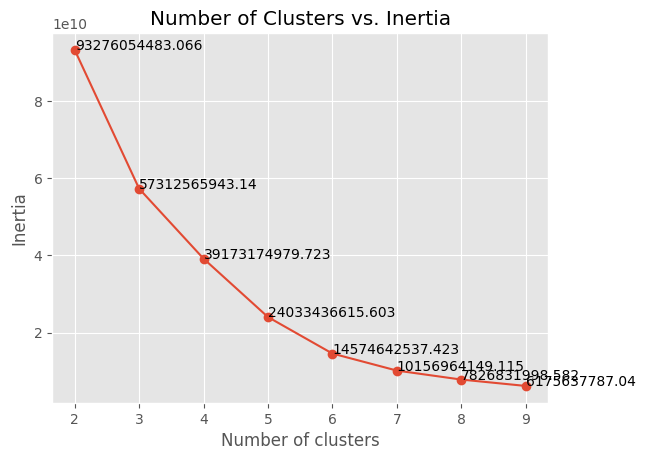

In [2373]:
ssd = []
num_of_clusters = list(range(2,10))

for n in num_of_clusters:
    km = KMeans(n_clusters=n, max_iter=50, random_state=101).fit(X)
    ssd.append(km.inertia_)
    
plt.plot(num_of_clusters, ssd, marker='o')

for xy in zip(num_of_clusters, ssd):    
#     plt.annotate(s="{:.3f}".format(xy[1]), xy=xy, textcoords='data')
    plt.annotate(text=f"{round(xy[1], 3)}", xy=xy, textcoords="data")

plt.xlabel("Number of clusters")
plt.ylabel("Inertia") # Inertia is within cluster sum of squares
plt.title("Number of Clusters vs. Inertia")
plt.show()


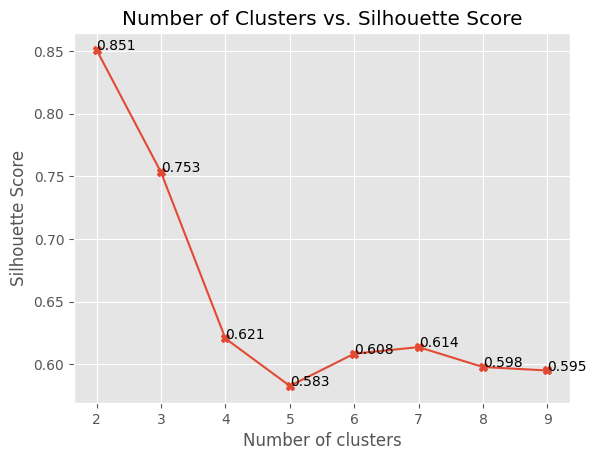

In [2374]:
num_of_clusters = list(range(2,10))
silhouette_value = []
for n in range(2,10):
    km = KMeans(n_clusters = n, random_state=101).fit(X)
    silhouette_value.append(silhouette_score(X, km.labels_))
    
plt.plot(num_of_clusters, silhouette_value, marker='X', label=silhouette_value)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score")

for xy in zip(num_of_clusters, silhouette_value):    
    plt.annotate(text=f"{round(xy[1], 3)}", xy=xy, textcoords="data")
    
plt.show()

In [2375]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[1 1 2 2 1 0 3 1 0 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 2 0 2 1 1 0 1 3 2 1 1
 1 2 1 1 2 0 1 2 1 2 1 2 2 2 2 3 2 1 2 2 1 0 1 0 2 1 1 2 2 1 2 1 1 2 1 1 1
 1 1 1 1 1 3 0 2 1 2 2 2 0 1 1 1 2 2 1 3 1 1 2 3 3 2 1 1 1 1 1 1 1 2 1 1 0
 1 1 1 0 2 2 3 1 0 0 1 1 2 1 1 1 2 1 1 0 2 3 3 0 0 1 1 1 3 2 0 0 1 0 2 0 3
 1 2 1 0 1 1 2 0 1 1 0 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 0 1 1 2 2 1 0
 1 2 1 1 2 0 0 1 1 2 2 2 3 1 1 1 1 1 1 0 1 2 1 1 1 1 0 1 2 2 2 1 2 2 1 2 2
 3 1 2 2 2 0 0 1 1 0 3 0 1 1 1 0 2 1 1 1 1 1 2 1 2 1 0 2 0 0 1 0 1 2 2 1 1
 2 1 1 1 2 1 1 1 0 1 1 1 2 2 2 3 1 1 1 0 0 1 0 0 1 1 0 1 1 0 2 0 1 2 1 0 0
 1 3 1 2 1 1 0 2 3 1 1 0 2 1 0 2 1 2 1 1 1 1 2 2 0 2 2 1 2 2 1 1 1 3 2 1 2
 1 1 3 2 1 1 1 3 0 1 2 1 1 3 1 1 2 3 1 2 1 3 1 0 2 2 1 1 2 1 2 1 1 2 0 2 2
 0 1 1 1 1 2 2 2 2 0 1 1 1 1 1 3 2 2 0 1 2 2 2 2 2 1 0 2 2 3 2 1 2 1 2 2 2
 3 1 1 1 3 0 1 1 1 1 2 2 0 3 2 2 2 1 1 3 2 2 1 2 1 1 0 1 1 3 2 2 1 1 0 1 3
 1 2 1 2 1 1 0 1 2 2 2 1 2 0 0 1 3 1 2 2 0 2 0 1 1 3 0 1 2 1 2 1 1 1 2 1 1
 1 2 2 2 1 1 0 2 2 2 2 2 

In [2376]:
# print(km.labels_)
# print(km.labels_.shape)

In [2377]:
# # import numpy as np

# # Load data for multiple weeks
# data = []
# for i in range(1, 13):
# #     filename = "customer_purchase_history_week" + str(i) + ".csv"
#     data.append(X)

# # Define number of clusters
# k = 3

# # Initialize consensus matrix
# n = len(data[0])
# C = np.zeros((n, n))

# # # Loop through weeks and calculate pairwise similarity matrix
# # for i in range(len(data)):
# #     # Select features
# #     X = data[i].iloc[:, 1:]
# #     # Initialize KMeans model
# #     kmeans = KMeans(n_clusters=k)
# #     # Fit KMeans model to data
# #     kmeans.fit(X)
# #     # Get cluster labels
# #     labels = kmeans.labels_
# #     # Update consensus matrix
# #     for j in range(n):
# #         for k in range(n):
# #             if labels[j] == labels[k]:
# #                 C[j, k] += 1

# # # Apply consensus function to consensus matrix
# # consensus_labels = np.argmax(C, axis=1)

# # # Add consensus labels to data
# # for i in range(len(data)):
# #     data[i]['cluster'] = consensus_labels

# # # View clusters
# # for i in range(k):
# #     print("Cluster ", i, ":")
# #     for j in range(len(data)):
# #         print("Week ", j+1, ":")
# #         print(data[j][data[j]['cluster'] == i])
# #         print("\n")

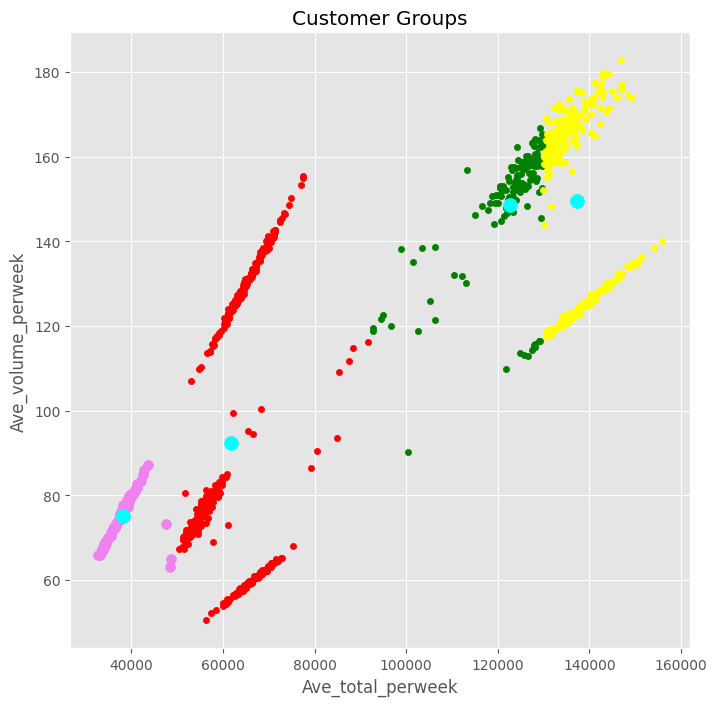

In [2378]:

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=20, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=20, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=20, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')
# plt.scatter(X[Y==5,0], X[Y==5,1], s=50, c='black', label='Cluster 5')
# plt.scatter(X[Y==6,0], X[Y==6,1], s=50, c='pink', label='Cluster 5')
# plt.scatter(X[Y==7,0], X[Y==7,1], s=50, c='orange', label='Cluster 5')
# plt.scatter(X[Y==8,0], X[Y==8,1], s=50, c='brown', label='Cluster 5')
# plt.scatter(X[Y==9,0], X[Y==9,1], s=50, c='gray', label='Cluster 5')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Ave_total_perweek')
plt.ylabel('Ave_volume_perweek')
plt.show()

In [2379]:
df_y = pd.DataFrame(Y, columns=['km'])
print(df_y)

     km
0     1
1     1
2     2
3     2
4     1
..   ..
946   2
947   1
948   0
949   1
950   0

[951 rows x 1 columns]


In [2380]:
df0


,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft)
832,ID1008,58618.166667,117.607500,3387.0
46096,ID1012,68552.916667,61.486111,1931.0
44544,ID1024,138558.125000,124.459722,3127.0
6439,ID1029,130342.305556,161.064861,5294.0
8136,ID1036,58346.306878,80.937698,2584.0
...,...,...,...,...
6613,ID9960,134599.012566,162.086819,4690.0
1732,ID9971,64936.013889,129.706944,3960.0
3674,ID9973,127664.861111,154.992361,4038.0
9812,ID9979,64296.250000,128.873056,4456.0


In [2381]:

df_merged = pd.concat([df0.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)

print(df_merged)

    Outlet_ID  Ave_total_perweek  Ave_volume_perweek  Ave_area(sqft)  km
0      ID1008       58618.166667          117.607500          3387.0   1
1      ID1012       68552.916667           61.486111          1931.0   1
2      ID1024      138558.125000          124.459722          3127.0   2
3      ID1029      130342.305556          161.064861          5294.0   2
4      ID1036       58346.306878           80.937698          2584.0   1
..        ...                ...                 ...             ...  ..
946    ID9960      134599.012566          162.086819          4690.0   2
947    ID9971       64936.013889          129.706944          3960.0   1
948    ID9973      127664.861111          154.992361          4038.0   0
949    ID9979       64296.250000          128.873056          4456.0   1
950    ID9980      102581.880952          118.844973          5891.5   0

[951 rows x 5 columns]


In [2382]:
print(df_merged['km'].value_counts())

1    457
2    283
0    138
3     73
Name: km, dtype: int64


In [2383]:
print("Cluster 0 of KMeans model")
print(df_merged[df_merged['km'] == 0].Outlet_ID.unique())

print("Cluster 1 of KMeans model")
print(df_merged[df_merged['km'] == 1].Outlet_ID.unique())

print("Cluster 2 of KMeans model")
print(df_merged[df_merged['km'] == 2].Outlet_ID.unique())

print("Cluster 3 of KMeans model")
print(df_merged[df_merged['km'] == 3].Outlet_ID.unique())



Cluster 0 of KMeans model
['ID1043' 'ID1093' 'ID1298' 'ID1314' 'ID1425' 'ID1543' 'ID1566' 'ID1764'
 'ID1811' 'ID1993' 'ID2031' 'ID2074' 'ID2077' 'ID2156' 'ID2241' 'ID2253'
 'ID2321' 'ID2327' 'ID2342' 'ID2370' 'ID2400' 'ID2432' 'ID2463' 'ID2670'
 'ID2798' 'ID2861' 'ID2886' 'ID3024' 'ID3127' 'ID3236' 'ID3247' 'ID3289'
 'ID3330' 'ID3376' 'ID3529' 'ID3549' 'ID3551' 'ID3570' 'ID3739' 'ID3839'
 'ID3844' 'ID3866' 'ID3871' 'ID3881' 'ID3922' 'ID3946' 'ID3985' 'ID3999'
 'ID4015' 'ID4035' 'ID4065' 'ID4159' 'ID4343' 'ID4473' 'ID4584' 'ID4606'
 'ID4716' 'ID4794' 'ID4865' 'ID4978' 'ID5062' 'ID5207' 'ID5287' 'ID5357'
 'ID5407' 'ID5426' 'ID5463' 'ID5498' 'ID5520' 'ID5646' 'ID5772' 'ID5913'
 'ID6046' 'ID6214' 'ID6226' 'ID6295' 'ID6296' 'ID6307' 'ID6357' 'ID6459'
 'ID6554' 'ID6558' 'ID6574' 'ID6620' 'ID6628' 'ID6708' 'ID6886' 'ID6901'
 'ID6927' 'ID6958' 'ID6967' 'ID6983' 'ID7018' 'ID7071' 'ID7109' 'ID7167'
 'ID7192' 'ID7293' 'ID7358' 'ID7369' 'ID7374' 'ID7377' 'ID7392' 'ID7473'
 'ID7496' 'ID7574' 'ID761

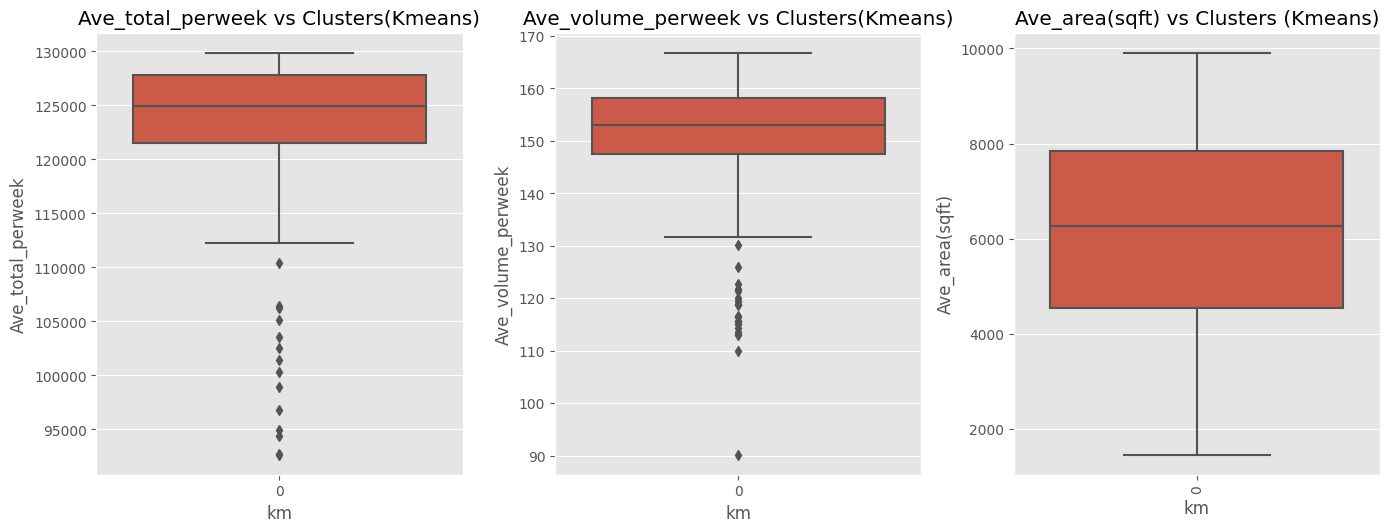

In [2384]:
df_km0 = df_merged[df_merged['km'] == 0]
df_km1 = df_merged[df_merged['km'] == 1]
df_km2 = df_merged[df_merged['km'] == 2]
df_km3 = df_merged[df_merged['km'] == 3]



fig = plt.figure(figsize=(14,10))

ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Clusters(Kmeans)")
sns.boxplot(x='km', y='Ave_total_perweek', data=df_km0, ax=ax4)

ax5 = fig.add_subplot(2, 3, 5, title="Ave_volume_perweek vs Clusters(Kmeans)")
sns.boxplot(x='km', y='Ave_volume_perweek', data=df_km0, ax=ax5)

ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_area(sqft)', data=df_km0, ax=ax6)


plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

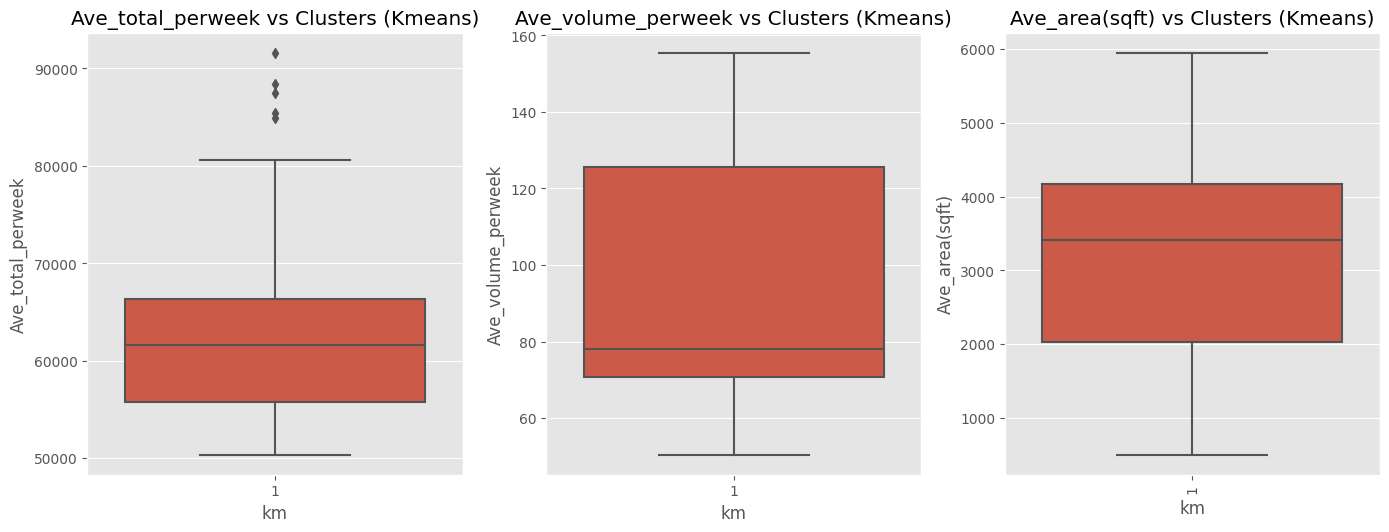

In [2385]:
fig = plt.figure(figsize=(14,10))

ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_total_perweek', data=df_km1, ax=ax4)

ax5 = fig.add_subplot(2, 3, 5, title="Ave_volume_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_volume_perweek', data=df_km1, ax=ax5)

ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_area(sqft)', data=df_km1, ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

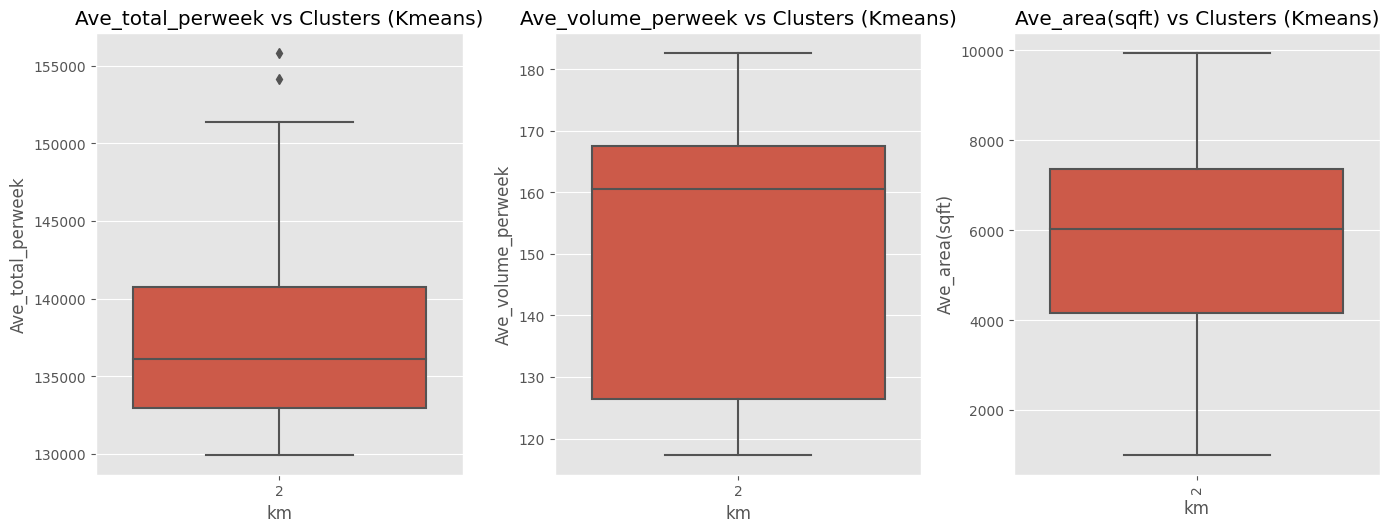

In [2386]:
fig = plt.figure(figsize=(14,10))

ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_total_perweek', data=df_km2, ax=ax4)

ax5 = fig.add_subplot(2, 3, 5, title="Ave_volume_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_volume_perweek', data=df_km2, ax=ax5)

ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_area(sqft)', data=df_km2, ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

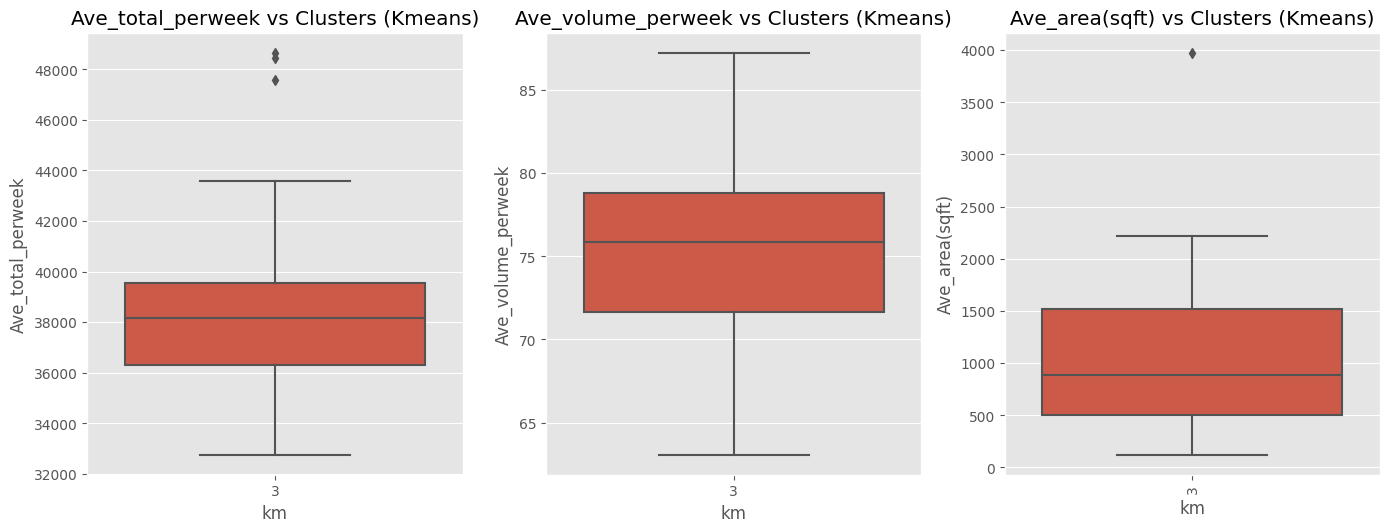

In [2387]:
fig = plt.figure(figsize=(14,10))

ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_total_perweek', data=df_km3, ax=ax4)

ax5 = fig.add_subplot(2, 3, 5, title="Ave_volume_perweek vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_volume_perweek', data=df_km3, ax=ax5)

ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Clusters (Kmeans)")
sns.boxplot(x='km', y='Ave_area(sqft)', data=df_km3, ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [2388]:
# fig = plt.figure(figsize=(10,6))

# ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Clusters (Kmeans)")
# sns.boxplot(x='km', y='Ave_total_perweek', data=df_merged, ax=ax4)

# ax5 = fig.add_subplot(2, 3, 5, title="Ave_volume_perweek vs Clusters (Kmeans)")
# sns.boxplot(x='km', y='Ave_volume_perweek', data=df_merged, ax=ax5)

# ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Clusters (Kmeans)")
# sns.boxplot(x='km', y='Ave_area(sqft)', data=df_merged, ax=ax6)

# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

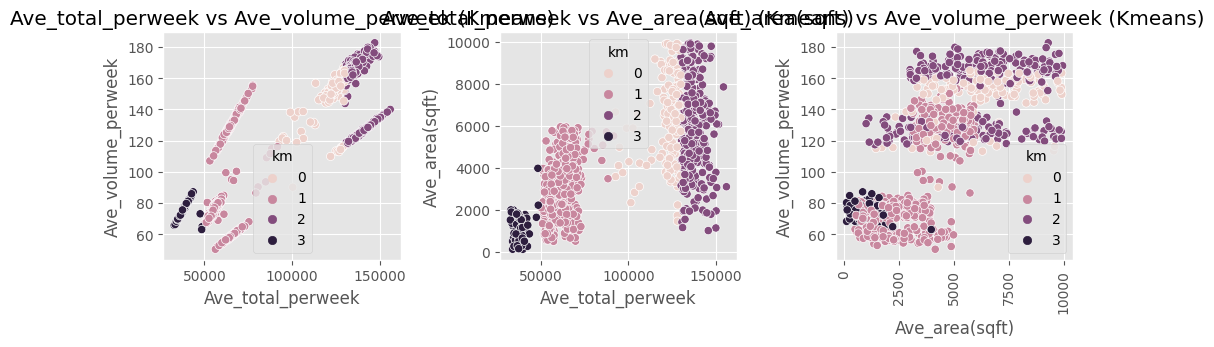

In [2389]:
fig = plt.figure(figsize=(10,6))

ax4 = fig.add_subplot(2, 3, 4, title="Ave_total_perweek vs Ave_volume_perweek (Kmeans)")
ax5 = fig.add_subplot(2, 3, 5, title="Ave_total_perweek vs Ave_area(sqft) (Kmeans)")
ax6 = fig.add_subplot(2, 3, 6, title="Ave_area(sqft) vs Ave_volume_perweek (Kmeans)")

sns.scatterplot(x='Ave_total_perweek', y='Ave_volume_perweek', hue='km', data=df_merged, ax=ax4)

sns.scatterplot(x='Ave_total_perweek', y='Ave_area(sqft)', hue='km', data=df_merged, ax=ax5)

sns.scatterplot(x='Ave_area(sqft)', y='Ave_volume_perweek', hue='km', data=df_merged, ax=ax6)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [2390]:
df0 = pd.concat([df0.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)

print(df0)

    Outlet_ID  Ave_total_perweek  Ave_volume_perweek  Ave_area(sqft)  km
0      ID1008       58618.166667          117.607500          3387.0   1
1      ID1012       68552.916667           61.486111          1931.0   1
2      ID1024      138558.125000          124.459722          3127.0   2
3      ID1029      130342.305556          161.064861          5294.0   2
4      ID1036       58346.306878           80.937698          2584.0   1
..        ...                ...                 ...             ...  ..
946    ID9960      134599.012566          162.086819          4690.0   2
947    ID9971       64936.013889          129.706944          3960.0   1
948    ID9973      127664.861111          154.992361          4038.0   0
949    ID9979       64296.250000          128.873056          4456.0   1
950    ID9980      102581.880952          118.844973          5891.5   0

[951 rows x 5 columns]


In [2391]:
df0

df01=df0.copy()
df02=df0.copy()
df_5=df_4.copy()

In [2392]:
df_4

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [2393]:
for i in df_4["Model Number"]:
    df01[i]=0


In [2394]:
for i in df_4["Model Number"]:
    for j,k in df01[["Ave_total_perweek","Outlet_ID"]].values:
        cost = df_4.loc[df_4['Model Number'] == i, 'Power and maitainance Cost (LKR) per 100 hours'].values[0] 
        ROI=j/(((cost)/100)*24*7)
        df01.loc[df01["Outlet_ID"] == k, i] = ROI

In [2395]:
df01

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,M001,M002,M003,M004,M005,M006,M007,M008,M009,M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,12.922876,11.630589,21.807354,12.461345,7.753726
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,15.113077,13.601769,25.503317,14.573324,9.067846
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,30.546324,27.491691,51.546922,29.455384,18.327794
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,28.735076,25.861569,48.490441,27.708823,17.241046
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,12.862942,11.576648,21.706215,12.403552,7.717765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,32.047384,28.613736,25.037019,44.510255,22.890989,29.673504,26.706153,50.074037,28.613736,17.804102
947,ID9971,64936.013889,129.706944,3960.0,1,15.460956,13.804425,12.078872,21.473550,11.043540,14.315700,12.884130,24.157743,13.804425,8.589420
948,ID9973,127664.861111,154.992361,4038.0,0,30.396396,27.139639,23.747184,42.217216,21.711711,28.144811,25.330330,47.494368,27.139639,16.886886
949,ID9979,64296.250000,128.873056,4456.0,1,15.308631,13.668420,11.959868,21.261987,10.934736,14.174658,12.757192,23.919736,13.668420,8.504795


In [2396]:
j=5
for i in df01.columns.values[5:15]:  
    df01.columns.values[j] = "In_"+i
    j+=1

In [2397]:
df01

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,In_M001,In_M002,In_M003,In_M004,In_M005,In_M006,In_M007,In_M008,In_M009,In_M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,12.922876,11.630589,21.807354,12.461345,7.753726
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,15.113077,13.601769,25.503317,14.573324,9.067846
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,30.546324,27.491691,51.546922,29.455384,18.327794
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,28.735076,25.861569,48.490441,27.708823,17.241046
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,12.862942,11.576648,21.706215,12.403552,7.717765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,32.047384,28.613736,25.037019,44.510255,22.890989,29.673504,26.706153,50.074037,28.613736,17.804102
947,ID9971,64936.013889,129.706944,3960.0,1,15.460956,13.804425,12.078872,21.473550,11.043540,14.315700,12.884130,24.157743,13.804425,8.589420
948,ID9973,127664.861111,154.992361,4038.0,0,30.396396,27.139639,23.747184,42.217216,21.711711,28.144811,25.330330,47.494368,27.139639,16.886886
949,ID9979,64296.250000,128.873056,4456.0,1,15.308631,13.668420,11.959868,21.261987,10.934736,14.174658,12.757192,23.919736,13.668420,8.504795


In [2398]:

for f in df_5["Model Number"]:
    print(f)
    df02[f]=0

M001
M002
M003
M004
M005
M006
M007
M008
M009
M010


In [2399]:

for i in df_5["Model Number"]:
    for j,k in df02[["Ave_volume_perweek","Outlet_ID"]].values:
        f_volume = df_5.loc[df_4['Model Number'] == i, 'Volume Capacity (Liters)'].values[0] 
        ISR=j/f_volume
        df02.loc[df01["Outlet_ID"] == k, i] = ISR

In [2400]:
df02

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,M001,M002,M003,M004,M005,M006,M007,M008,M009,M010
0,ID1008,58618.166667,117.607500,3387.0,1,2.138318,1.568100,0.980063,3.920250,0.784050,1.809346,1.176075,4.704300,1.470094,0.588037
1,ID1012,68552.916667,61.486111,1931.0,1,1.117929,0.819815,0.512384,2.049537,0.409907,0.945940,0.614861,2.459444,0.768576,0.307431
2,ID1024,138558.125000,124.459722,3127.0,2,2.262904,1.659463,1.037164,4.148657,0.829731,1.914765,1.244597,4.978389,1.555747,0.622299
3,ID1029,130342.305556,161.064861,5294.0,2,2.928452,2.147531,1.342207,5.368829,1.073766,2.477921,1.610649,6.442594,2.013311,0.805324
4,ID1036,58346.306878,80.937698,2584.0,1,1.471595,1.079169,0.674481,2.697923,0.539585,1.245195,0.809377,3.237508,1.011721,0.404688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,2.947033,2.161158,1.350723,5.402894,1.080579,2.493643,1.620868,6.483473,2.026085,0.810434
947,ID9971,64936.013889,129.706944,3960.0,1,2.358308,1.729426,1.080891,4.323565,0.864713,1.995491,1.297069,5.188278,1.621337,0.648535
948,ID9973,127664.861111,154.992361,4038.0,0,2.818043,2.066565,1.291603,5.166412,1.033282,2.384498,1.549924,6.199694,1.937405,0.774962
949,ID9979,64296.250000,128.873056,4456.0,1,2.343146,1.718307,1.073942,4.295769,0.859154,1.982662,1.288731,5.154922,1.610913,0.644365


In [2401]:
j=5
k=1
for i in df02.columns.values[5:15]:
#     df02 = df02.rename(columns={j: "R_M"+str(f"{k:03}")})
    df02.columns.values[j] ="R_M"+str(f"{k:03}")
    j+=1
    k+=1
# df02 = df02.rename(columns={"M010": "R_M"+str(f"{10:03}")})

In [2402]:
df02

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,R_M001,R_M002,R_M003,R_M004,R_M005,R_M006,R_M007,R_M008,R_M009,R_M010
0,ID1008,58618.166667,117.607500,3387.0,1,2.138318,1.568100,0.980063,3.920250,0.784050,1.809346,1.176075,4.704300,1.470094,0.588037
1,ID1012,68552.916667,61.486111,1931.0,1,1.117929,0.819815,0.512384,2.049537,0.409907,0.945940,0.614861,2.459444,0.768576,0.307431
2,ID1024,138558.125000,124.459722,3127.0,2,2.262904,1.659463,1.037164,4.148657,0.829731,1.914765,1.244597,4.978389,1.555747,0.622299
3,ID1029,130342.305556,161.064861,5294.0,2,2.928452,2.147531,1.342207,5.368829,1.073766,2.477921,1.610649,6.442594,2.013311,0.805324
4,ID1036,58346.306878,80.937698,2584.0,1,1.471595,1.079169,0.674481,2.697923,0.539585,1.245195,0.809377,3.237508,1.011721,0.404688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,2.947033,2.161158,1.350723,5.402894,1.080579,2.493643,1.620868,6.483473,2.026085,0.810434
947,ID9971,64936.013889,129.706944,3960.0,1,2.358308,1.729426,1.080891,4.323565,0.864713,1.995491,1.297069,5.188278,1.621337,0.648535
948,ID9973,127664.861111,154.992361,4038.0,0,2.818043,2.066565,1.291603,5.166412,1.033282,2.384498,1.549924,6.199694,1.937405,0.774962
949,ID9979,64296.250000,128.873056,4456.0,1,2.343146,1.718307,1.073942,4.295769,0.859154,1.982662,1.288731,5.154922,1.610913,0.644365


In [2403]:
df01

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,In_M001,In_M002,In_M003,In_M004,In_M005,In_M006,In_M007,In_M008,In_M009,In_M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,12.922876,11.630589,21.807354,12.461345,7.753726
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,15.113077,13.601769,25.503317,14.573324,9.067846
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,30.546324,27.491691,51.546922,29.455384,18.327794
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,28.735076,25.861569,48.490441,27.708823,17.241046
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,12.862942,11.576648,21.706215,12.403552,7.717765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,32.047384,28.613736,25.037019,44.510255,22.890989,29.673504,26.706153,50.074037,28.613736,17.804102
947,ID9971,64936.013889,129.706944,3960.0,1,15.460956,13.804425,12.078872,21.473550,11.043540,14.315700,12.884130,24.157743,13.804425,8.589420
948,ID9973,127664.861111,154.992361,4038.0,0,30.396396,27.139639,23.747184,42.217216,21.711711,28.144811,25.330330,47.494368,27.139639,16.886886
949,ID9979,64296.250000,128.873056,4456.0,1,15.308631,13.668420,11.959868,21.261987,10.934736,14.174658,12.757192,23.919736,13.668420,8.504795


In [2404]:
# df02=df01.copy()

In [2405]:
# df01.columns

In [2406]:

# df01\
df01.head()

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,In_M001,In_M002,In_M003,In_M004,In_M005,In_M006,In_M007,In_M008,In_M009,In_M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,12.922876,11.630589,21.807354,12.461345,7.753726
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,15.113077,13.601769,25.503317,14.573324,9.067846
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,30.546324,27.491691,51.546922,29.455384,18.327794
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,28.735076,25.861569,48.490441,27.708823,17.241046
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,12.862942,11.576648,21.706215,12.403552,7.717765


In [2407]:
df02.head()

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,R_M001,R_M002,R_M003,R_M004,R_M005,R_M006,R_M007,R_M008,R_M009,R_M010
0,ID1008,58618.166667,117.607500,3387.0,1,2.138318,1.568100,0.980063,3.920250,0.784050,1.809346,1.176075,4.704300,1.470094,0.588037
1,ID1012,68552.916667,61.486111,1931.0,1,1.117929,0.819815,0.512384,2.049537,0.409907,0.945940,0.614861,2.459444,0.768576,0.307431
2,ID1024,138558.125000,124.459722,3127.0,2,2.262904,1.659463,1.037164,4.148657,0.829731,1.914765,1.244597,4.978389,1.555747,0.622299
3,ID1029,130342.305556,161.064861,5294.0,2,2.928452,2.147531,1.342207,5.368829,1.073766,2.477921,1.610649,6.442594,2.013311,0.805324
4,ID1036,58346.306878,80.937698,2584.0,1,1.471595,1.079169,0.674481,2.697923,0.539585,1.245195,0.809377,3.237508,1.011721,0.404688


In [2408]:
df03=df02.copy()
df04 = pd.merge(df01, df03, left_index=True, right_index=True)
df04 = df04.rename(columns={'Outlet_ID_x': 'Outlet_ID','Ave_total_perweek_x':'Ave_total_perweek','Ave_volume_perweek_x':'Ave_volume_perweek','Ave_area(sqft)_x':'Ave_area(sqft)','km_x':'km'})


In [2409]:
df04=df04.drop(['Outlet_ID_y','Ave_total_perweek_y','Ave_volume_perweek_y','Ave_area(sqft)_y','km_y'],axis=1)

In [2410]:
df04.columns

Index(['Outlet_ID', 'Ave_total_perweek', 'Ave_volume_perweek',
       'Ave_area(sqft)', 'km', 'In_M001', 'In_M002', 'In_M003', 'In_M004',
       'In_M005', 'In_M006', 'In_M007', 'In_M008', 'In_M009', 'In_M010',
       'R_M001', 'R_M002', 'R_M003', 'R_M004', 'R_M005', 'R_M006', 'R_M007',
       'R_M008', 'R_M009', 'R_M010'],
      dtype='object')

In [2411]:
# dffff = df.drop(['Outlet_ID', 'pid','product_name'], axis=1)

# # Display the modified DataFrame
# # print('Modified DataFrame:')
# # dffff.head()
# df02
df04

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,In_M001,In_M002,In_M003,In_M004,In_M005,...,R_M001,R_M002,R_M003,R_M004,R_M005,R_M006,R_M007,R_M008,R_M009,R_M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,...,2.138318,1.568100,0.980063,3.920250,0.784050,1.809346,1.176075,4.704300,1.470094,0.588037
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,...,1.117929,0.819815,0.512384,2.049537,0.409907,0.945940,0.614861,2.459444,0.768576,0.307431
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,...,2.262904,1.659463,1.037164,4.148657,0.829731,1.914765,1.244597,4.978389,1.555747,0.622299
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,...,2.928452,2.147531,1.342207,5.368829,1.073766,2.477921,1.610649,6.442594,2.013311,0.805324
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,...,1.471595,1.079169,0.674481,2.697923,0.539585,1.245195,0.809377,3.237508,1.011721,0.404688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,32.047384,28.613736,25.037019,44.510255,22.890989,...,2.947033,2.161158,1.350723,5.402894,1.080579,2.493643,1.620868,6.483473,2.026085,0.810434
947,ID9971,64936.013889,129.706944,3960.0,1,15.460956,13.804425,12.078872,21.473550,11.043540,...,2.358308,1.729426,1.080891,4.323565,0.864713,1.995491,1.297069,5.188278,1.621337,0.648535
948,ID9973,127664.861111,154.992361,4038.0,0,30.396396,27.139639,23.747184,42.217216,21.711711,...,2.818043,2.066565,1.291603,5.166412,1.033282,2.384498,1.549924,6.199694,1.937405,0.774962
949,ID9979,64296.250000,128.873056,4456.0,1,15.308631,13.668420,11.959868,21.261987,10.934736,...,2.343146,1.718307,1.073942,4.295769,0.859154,1.982662,1.288731,5.154922,1.610913,0.644365


In [2420]:
df_km0 = df04[df_merged['km'] == 0]
df_km1 = df04[df_merged['km'] == 1]
df_km2 = df04[df_merged['km'] == 2]
df_km3 = df04[df_merged['km'] == 3]

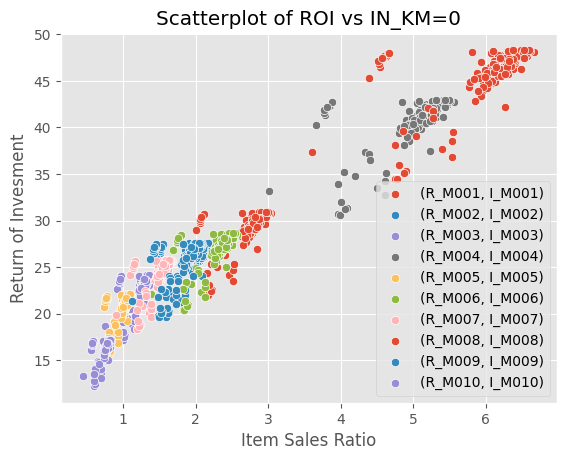

In [2427]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a scatterplot for each pair of columns
sns.scatterplot(data=df_km0, x='R_M001', y='In_M001', label='(R_M001, I_M001)')
sns.scatterplot(data=df_km0, x='R_M002', y='In_M002', label='(R_M002, I_M002)')
sns.scatterplot(data=df_km0, x='R_M003', y='In_M003', label='(R_M003, I_M003)')
sns.scatterplot(data=df_km0, x='R_M004', y='In_M004', label='(R_M004, I_M004)')
sns.scatterplot(data=df_km0, x='R_M005', y='In_M005', label='(R_M005, I_M005)')
sns.scatterplot(data=df_km0, x='R_M006', y='In_M006', label='(R_M006, I_M006)')
sns.scatterplot(data=df_km0, x='R_M007', y='In_M007', label='(R_M007, I_M007)')
sns.scatterplot(data=df_km0, x='R_M008', y='In_M008', label='(R_M008, I_M008)')
sns.scatterplot(data=df_km0, x='R_M009', y='In_M009', label='(R_M009, I_M009)')
sns.scatterplot(data=df_km0, x='R_M010', y='In_M010', label='(R_M010, I_M010)')

# add legend, axis labels, and title
plt.legend()
plt.xlabel('Item Sales Ratio')
plt.ylabel('Return of Invesment')
plt.title('Scatterplot of ROI vs IN_KM=0')
plt.show()

#    M005

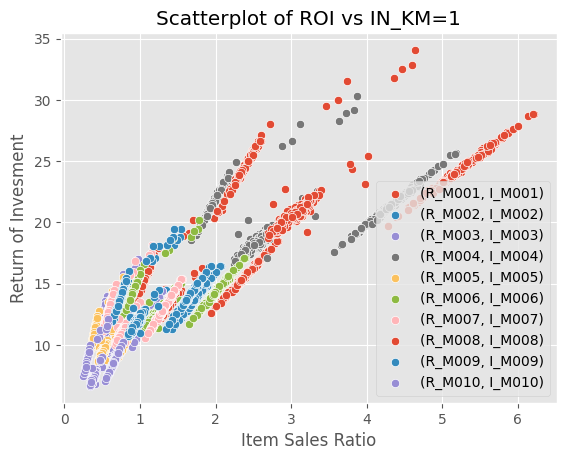

In [2428]:
# create a scatterplot for each pair of columns
sns.scatterplot(data=df_km1, x='R_M001', y='In_M001', label='(R_M001, I_M001)')
sns.scatterplot(data=df_km1, x='R_M002', y='In_M002', label='(R_M002, I_M002)')
sns.scatterplot(data=df_km1, x='R_M003', y='In_M003', label='(R_M003, I_M003)')
sns.scatterplot(data=df_km1, x='R_M004', y='In_M004', label='(R_M004, I_M004)')
sns.scatterplot(data=df_km1, x='R_M005', y='In_M005', label='(R_M005, I_M005)')
sns.scatterplot(data=df_km1, x='R_M006', y='In_M006', label='(R_M006, I_M006)')
sns.scatterplot(data=df_km1, x='R_M007', y='In_M007', label='(R_M007, I_M007)')
sns.scatterplot(data=df_km1, x='R_M008', y='In_M008', label='(R_M008, I_M008)')
sns.scatterplot(data=df_km1, x='R_M009', y='In_M009', label='(R_M009, I_M009)')
sns.scatterplot(data=df_km1, x='R_M010', y='In_M010', label='(R_M010, I_M010)')

# add legend, axis labels, and title
plt.legend()
plt.xlabel('Item Sales Ratio')
plt.ylabel('Return of Invesment')
plt.title('Scatterplot of ROI vs IN_KM=1')
plt.show()


# M007

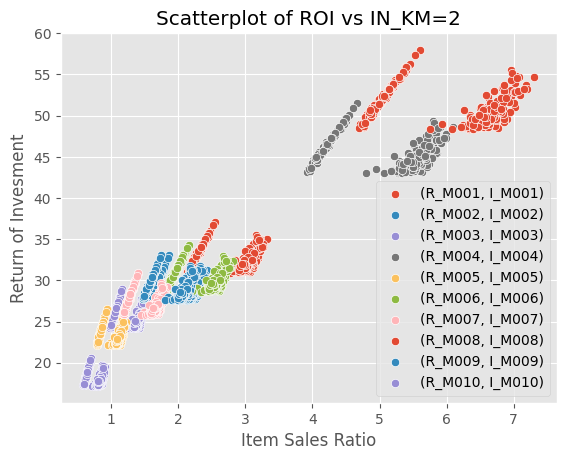

In [2437]:
# create a scatterplot for each pair of columns
sns.scatterplot(data=df_km2, x='R_M001', y='In_M001', label='(R_M001, I_M001)')
sns.scatterplot(data=df_km2, x='R_M002', y='In_M002', label='(R_M002, I_M002)')
sns.scatterplot(data=df_km2, x='R_M003', y='In_M003', label='(R_M003, I_M003)')
sns.scatterplot(data=df_km2, x='R_M004', y='In_M004', label='(R_M004, I_M004)')
sns.scatterplot(data=df_km2, x='R_M005', y='In_M005', label='(R_M005, I_M005)')
sns.scatterplot(data=df_km2, x='R_M006', y='In_M006', label='(R_M006, I_M006)')
sns.scatterplot(data=df_km2, x='R_M007', y='In_M007', label='(R_M007, I_M007)')
sns.scatterplot(data=df_km2, x='R_M008', y='In_M008', label='(R_M008, I_M008)')
sns.scatterplot(data=df_km2, x='R_M009', y='In_M009', label='(R_M009, I_M009)')
sns.scatterplot(data=df_km2, x='R_M010', y='In_M010', label='(R_M010, I_M010)')

# add legend, axis labels, and title
plt.legend()
plt.xlabel('Item Sales Ratio')
plt.ylabel('Return of Invesment')
plt.title('Scatterplot of ROI vs IN_KM=2')
plt.show()


# M010

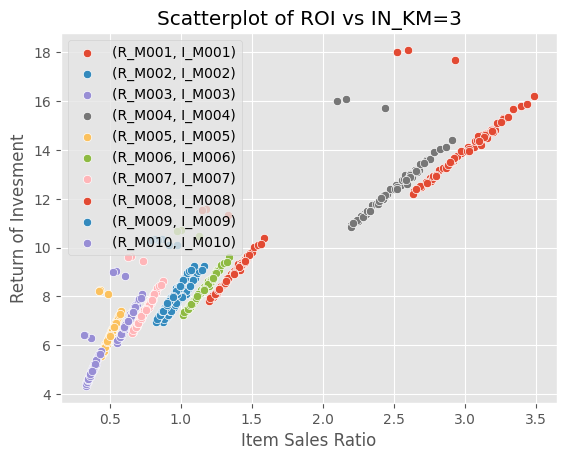

In [2430]:
# create a scatterplot for each pair of columns
sns.scatterplot(data=df_km3, x='R_M001', y='In_M001', label='(R_M001, I_M001)')
sns.scatterplot(data=df_km3, x='R_M002', y='In_M002', label='(R_M002, I_M002)')
sns.scatterplot(data=df_km3, x='R_M003', y='In_M003', label='(R_M003, I_M003)')
sns.scatterplot(data=df_km3, x='R_M004', y='In_M004', label='(R_M004, I_M004)')
sns.scatterplot(data=df_km3, x='R_M005', y='In_M005', label='(R_M005, I_M005)')
sns.scatterplot(data=df_km3, x='R_M006', y='In_M006', label='(R_M006, I_M006)')
sns.scatterplot(data=df_km3, x='R_M007', y='In_M007', label='(R_M007, I_M007)')
sns.scatterplot(data=df_km3, x='R_M008', y='In_M008', label='(R_M008, I_M008)')
sns.scatterplot(data=df_km3, x='R_M009', y='In_M009', label='(R_M009, I_M009)')
sns.scatterplot(data=df_km3, x='R_M010', y='In_M010', label='(R_M010, I_M010)')

# add legend, axis labels, and title
plt.legend()
plt.xlabel('Item Sales Ratio')
plt.ylabel('Return of Invesment')
plt.title('Scatterplot of ROI vs IN_KM=3')
plt.show()


#    MOO9

In [2440]:
df04

,Outlet_ID,Ave_total_perweek,Ave_volume_perweek,Ave_area(sqft),km,In_M001,In_M002,In_M003,In_M004,In_M005,...,R_M001,R_M002,R_M003,R_M004,R_M005,R_M006,R_M007,R_M008,R_M009,R_M010
0,ID1008,58618.166667,117.607500,3387.0,1,13.956706,12.461345,10.903677,19.384314,9.969076,...,2.138318,1.568100,0.980063,3.920250,0.784050,1.809346,1.176075,4.704300,1.470094,0.588037
1,ID1012,68552.916667,61.486111,1931.0,1,16.322123,14.573324,12.751659,22.669615,11.658659,...,1.117929,0.819815,0.512384,2.049537,0.409907,0.945940,0.614861,2.459444,0.768576,0.307431
2,ID1024,138558.125000,124.459722,3127.0,2,32.990030,29.455384,25.773461,45.819486,23.564307,...,2.262904,1.659463,1.037164,4.148657,0.829731,1.914765,1.244597,4.978389,1.555747,0.622299
3,ID1029,130342.305556,161.064861,5294.0,2,31.033882,27.708823,24.245221,43.102614,22.167059,...,2.928452,2.147531,1.342207,5.368829,1.073766,2.477921,1.610649,6.442594,2.013311,0.805324
4,ID1036,58346.306878,80.937698,2584.0,1,13.891978,12.403552,10.853108,19.294414,9.922841,...,1.471595,1.079169,0.674481,2.697923,0.539585,1.245195,0.809377,3.237508,1.011721,0.404688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID9960,134599.012566,162.086819,4690.0,2,32.047384,28.613736,25.037019,44.510255,22.890989,...,2.947033,2.161158,1.350723,5.402894,1.080579,2.493643,1.620868,6.483473,2.026085,0.810434
947,ID9971,64936.013889,129.706944,3960.0,1,15.460956,13.804425,12.078872,21.473550,11.043540,...,2.358308,1.729426,1.080891,4.323565,0.864713,1.995491,1.297069,5.188278,1.621337,0.648535
948,ID9973,127664.861111,154.992361,4038.0,0,30.396396,27.139639,23.747184,42.217216,21.711711,...,2.818043,2.066565,1.291603,5.166412,1.033282,2.384498,1.549924,6.199694,1.937405,0.774962
949,ID9979,64296.250000,128.873056,4456.0,1,15.308631,13.668420,11.959868,21.261987,10.934736,...,2.343146,1.718307,1.073942,4.295769,0.859154,1.982662,1.288731,5.154922,1.610913,0.644365


In [2444]:

df04['FRE'] = 'M005'  # set default value of 'FRE' column to 'M009'
df04.loc[df04['km'] == 1, 'FRE'] = 'M007'  # set 'FRE' column value to 'M005' where 'KM' is 0
df04.loc[df04['km'] == 2, 'FRE'] = 'M010'  # set 'FRE' column value to 'M005' where 'KM' is 0
df04.loc[df04['km'] == 3, 'FRE'] = 'M009'  # set 'FRE' column value to 'M005' where 'KM' is 0

print(df04)

    Outlet_ID  Ave_total_perweek  Ave_volume_perweek  Ave_area(sqft)  km  \
0      ID1008       58618.166667          117.607500          3387.0   1   
1      ID1012       68552.916667           61.486111          1931.0   1   
2      ID1024      138558.125000          124.459722          3127.0   2   
3      ID1029      130342.305556          161.064861          5294.0   2   
4      ID1036       58346.306878           80.937698          2584.0   1   
..        ...                ...                 ...             ...  ..   
946    ID9960      134599.012566          162.086819          4690.0   2   
947    ID9971       64936.013889          129.706944          3960.0   1   
948    ID9973      127664.861111          154.992361          4038.0   0   
949    ID9979       64296.250000          128.873056          4456.0   1   
950    ID9980      102581.880952          118.844973          5891.5   0   

       In_M001    In_M002    In_M003    In_M004    In_M005  ...    R_M002  \
0    13.95

In [2445]:
df06=df04[["Outlet_ID","km"]]
df06["Freezer"]=0
 # create a dictionary of freezer allocation for each cluster
freezer_allocation = {
    0: "M005",
    1: "M007",
    2: "M010",
    3: "M009"
    # add more clusters and corresponding freezers as needed
}

# allocate freezers based on km clusters
for index, row in df06.iterrows():
    km_cluster = row['km']
    freezer = freezer_allocation.get(km_cluster, 0) # default freezer is 0 if km cluster is not in the dictionary
    df06.loc[index, 'Freezer'] = freezer


In [2446]:
df06

,Outlet_ID,km,Freezer
0,ID1008,1,M007
1,ID1012,1,M007
2,ID1024,2,M010
3,ID1029,2,M010
4,ID1036,1,M007
...,...,...,...
946,ID9960,2,M010
947,ID9971,1,M007
948,ID9973,0,M005
949,ID9979,1,M007


In [2452]:
df06=df06.drop(["km"],axis=1)

In [2453]:
df06.to_csv("Submission.csv")